## Pre-Processing

In [ ]:
from source import data_import
from source.constants import CHANNELS, DEFAULT_PATIENTS
import numpy as np
# import pandas as pd
import modin.pandas as pd

from source.calculate_mean_psd import calculate_mean_psd
from source.constants import CHANNELS, FREQUENCY_RANGES

In [23]:
## PARAMETERS ##
# DATA # 
from doctest import SKIP

SKIP_DATA = True
data_filename = 'processed_data'
patient_ids = [1,2], #DEFAULT_PATIENTS
nr_segments=60,
segment_duration=1,
ictal_segmentation_foo=data_import.preictal_segmentation,
interictal_segmentation_foo=data_import.inter_segmentation,
channels=CHANNELS,
seizure_offset=0

# filter #
exclude_ranges=[[58, 62], [118, 122]]

# FEATURES #
SKIP_FEATURES = False
feature_filename = 'processed_features.npy'
target_colname = 'target'
PRED_INTERVAL = 6000 # how long should a segment count as preictal in seconds

window_size = 30 # Define the sequence_train window size

In [24]:
if not SKIP_DATA:
    # Load Patient Data
    p_df = data_import.load_segmented_data(patient_ids=patient_ids,
                                            nr_segments=nr_segments,
                                            segment_duration=segment_duration,
                                            ictal_segmentation_foo=data_import.preictal_segmentation,
                                            interictal_segmentation_foo=data_import.inter_segmentation,
                                            channels=channels,
                                            seizure_offset=seizure_offset
                                            )
    np.save('data/'+data_filename, p_df)
    p_df.head()
else:
    p_df = np.load('data/'+data_filename+'.npy', allow_pickle=True)
    p_df = pd.DataFrame(p_df)
    p_df.head

chb01_01.edf was import but not resampled 256Hz.
chb01_02.edf was import but not resampled 256Hz.
chb01_03.edf was import but not resampled 256Hz.
chb01_03.edf seizure and buffer was labeled
chb01_04.edf was import but not resampled 256Hz.
chb01_04.edf seizure and buffer was labeled
chb01_05.edf was import but not resampled 256Hz.
chb01_06.edf was import but not resampled 256Hz.
chb01_07.edf was import but not resampled 256Hz.
chb01_08.edf was import but not resampled 256Hz.
chb01_09.edf was import but not resampled 256Hz.
chb01_10.edf was import but not resampled 256Hz.
chb01_11.edf was import but not resampled 256Hz.
chb01_12.edf was import but not resampled 256Hz.
chb01_13.edf was import but not resampled 256Hz.
chb01_14.edf was import but not resampled 256Hz.
chb01_15.edf was import but not resampled 256Hz.
chb01_15.edf seizure and buffer was labeled
chb01_16.edf was import but not resampled 256Hz.
chb01_16.edf seizure and buffer was labeled
chb01_17.edf was import but not resample

channel,F7-T7,FP1-F3,F3-C3,FP2-F4,F4-C4,T8-P8-0,FZ-CZ,CZ-PZ,FT9-FT10,T8-P8-1,is_seizure,before_seizure,seizure_start,target,epoch,segment_id
0 days 00:30:00,27.545788,65.836386,29.890110,48.644689,24.810745,18.559219,26.373626,4.102564,-4.884005,18.559219,False,False,False,0 days,0,0
0 days 00:30:00.003906250,29.499389,65.054945,26.373626,43.174603,25.201465,11.135531,25.982906,5.274725,-10.354090,11.135531,False,False,False,0 days,0,0
0 days 00:30:00.007812500,27.545788,61.147741,25.982906,40.439560,22.075702,2.539683,26.764347,5.665446,-9.181929,2.539683,False,False,False,0 days,0,0
0 days 00:30:00.011718750,24.029304,61.929182,25.592186,38.876679,22.857143,2.148962,25.592186,8.400488,-15.824176,2.148962,False,False,False,0 days,0,0
0 days 00:30:00.015625,20.512821,65.836386,18.559219,39.658120,22.466422,1.367521,21.684982,5.274725,-9.181929,1.367521,False,False,False,0 days,0,0


In [25]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 6758400 entries, 0 days 00:30:00 to 0 days 00:30:59.996093750
Data columns (total 16 columns):
 #   Column          Dtype          
---  ------          -----          
 0   F7-T7           float64        
 1   FP1-F3          float64        
 2   F3-C3           float64        
 3   FP2-F4          float64        
 4   F4-C4           float64        
 5   T8-P8-0         float64        
 6   FZ-CZ           float64        
 7   CZ-PZ           float64        
 8   FT9-FT10        float64        
 9   T8-P8-1         float64        
 10  is_seizure      bool           
 11  before_seizure  bool           
 12  seizure_start   bool           
 13  target          timedelta64[ns]
 14  epoch           int64          
 15  segment_id      int64          
dtypes: bool(3), float64(10), int64(2), timedelta64[ns](1)
memory usage: 741.2 MB


In [13]:
# Filter
from source.filter_eeg_channels import filter_eeg_channels

# exclude_ranges=[[58, 62], [118, 122]]
fit_df = filter_eeg_channels(p_df, CHANNELS, fs=256, exclude_ranges=exclude_ranges, Q=30)
pd_toconcat = p_df[['epoch', 'segment_id']]
fit_df = pd.concat(objs=[fit_df, pd_toconcat], axis =1)
fit_df.head()

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init()

2023-11-13 16:09:35,422	INFO worker.py:1642 -- Started a local Ray instance.


channel,F4-C4,F3-C3,FT9-FT10,FZ-CZ,F7-T7,FP2-F4,T8-P8-1,T8-P8-0,FP1-F3,CZ-PZ,before_seizure,is_seizure,target,epoch,segment_id
0 days 00:30:00,16.878726,20.334213,-3.322584,17.941953,18.739373,33.092935,12.625819,12.625819,44.788430,2.790970,False,False,0 days,0,0
0 days 00:30:00.003906250,22.891349,24.865283,-8.175141,23.784967,26.448730,40.639022,11.874291,11.874291,59.506243,4.538652,False,False,0 days,0,0
0 days 00:30:00.007812500,22.162881,25.360125,-8.902114,25.615925,27.023819,40.074853,5.285063,5.285063,60.136641,5.292160,False,False,0 days,0,0
0 days 00:30:00.011718750,29.573426,33.953147,-14.930178,33.038895,32.700204,52.956037,8.308854,8.308854,79.842157,8.558853,False,False,0 days,0,0
0 days 00:30:00.015625,21.292400,18.163275,-11.955401,21.366748,20.938086,35.328903,-1.132117,-1.132117,60.607725,6.096930,False,False,0 days,0,0


## Feature Extraction

In [15]:
### aggregate Functions for mean psd:
delta = lambda x: calculate_mean_psd(x, frequency_ranges={'Delta' : FREQUENCY_RANGES['Delta']})[x.name]['Delta']
theta = lambda x: calculate_mean_psd(x, frequency_ranges={'Theta' : FREQUENCY_RANGES['Theta']})[x.name]['Theta']
gamma = lambda x: calculate_mean_psd(x, frequency_ranges={'Gamma': FREQUENCY_RANGES['Gamma']})[x.name]['Gamma']

delta_agg = pd.NamedAgg(column='delta', aggfunc=delta)
theta_agg = pd.NamedAgg(column='theta', aggfunc=theta)
gamma_agg = pd.NamedAgg(column='gamma', aggfunc=gamma)

### aggregate mean features:
abs_mean = lambda x: x.apply(abs).mean()
abs_mean_agg = pd.NamedAgg(column='abs_mean', aggfunc=abs_mean)

### aggregate Functions for target:
target_foo = lambda x, pred_interval=PRED_INTERVAL: 0 < x.dt.total_seconds().min() < pred_interval

In [16]:
df_features = fit_df.groupby(['epoch', 'segment_id']).agg(
    {C:['std',
        'var',
        #'mean',
        abs_mean_agg,
        delta_agg,
        theta_agg,
        gamma_agg
        ] for C in CHANNELS} | 
    {target_colname: [target_foo]} 
    ) 
df_features.head()

channel               F4-C4                                               \
                        std         var   abs_mean      delta      theta   
epoch segment_id                                                           
0     0           28.535956  814.300765  23.474976  91.216311  22.066200   
      1           15.763829  248.498306  12.224155  38.354721   5.081434   
      2           15.423302  237.878237  12.624893  37.979591  17.939820   
      3           19.534544  381.598402  14.705306  17.657032  14.363613   
      4           11.926589  142.243524   9.669304  11.649572   5.357976   

channel                         F3-C3                                    ...  \
                     gamma        std         var   abs_mean      delta  ...   
epoch segment_id                                                         ...   
0     0           1.361588  26.318663  692.672009  22.161551  84.172459  ...   
      1           2.206003  17.842494  318.354586  14.392837  52.233751  ...   
      2           1.250689  17.309557  299.620748  13.648520  71.069314  ...   
      3           0.886137  23.789589  565.944568  19.939037  93.422189  ...   
      4           0.655076  14.409950  207.646670  11.128378  24.074110  ...   

channel                FP1-F3                             CZ-PZ              \
                        delta       theta      gamma        std         var   
epoch segment_id                                                              
0     0           3299.014312  133.693556  24.922660  15.911194  253.166088   
      1             91.956241   18.439422  26.285195  19.455036  378.498434   
      2             18.244851   12.898840  19.709367  10.904365  118.905170   
      3              8.603413   11.214552  28.504306  16.657623  277.476413   
      4             44.014189   14.762290  15.644881  11.409362  130.173550   

channel                                                       target  
                   abs_mean      delta      theta     gamma <lambda>  
epoch segment_id                                                      
0     0           12.757492  16.902136   9.094517  0.397391    False  
      1           15.971641  77.795698  11.034774  0.323830    False  
      2           14.165546  12.596440  10.404335  0.182872    False  
      3           13.488792  17.872971  20.929250  0.237983    False  
      4            8.883672  15.173503   8.389444  0.373024    False  

[5 rows x 61 columns]

In [17]:
# joining column names with agg functions, but leaving target column
df_features.columns = ['_'.join(col).strip() for col in df_features.columns.values if target_colname != col[0]] + [target_colname]
df_features.reset_index(inplace=True)
df_features.tail(10)


,epoch,segment_id,F4-C4_std,F4-C4_var,F4-C4_abs_mean,F4-C4_delta,F4-C4_theta,F4-C4_gamma,F3-C3_std,F3-C3_var,...,FP1-F3_delta,FP1-F3_theta,FP1-F3_gamma,CZ-PZ_std,CZ-PZ_var,CZ-PZ_abs_mean,CZ-PZ_delta,CZ-PZ_theta,CZ-PZ_gamma,target
4670,77,50,43.012950,1850.113842,36.747151,196.272850,117.232211,0.471774,43.818260,1920.039899,...,2673.727313,102.983154,7.325724,69.017010,4763.347635,57.562936,825.882220,236.655691,0.265406,False
4671,77,51,31.637075,1000.904533,30.407857,167.613022,130.114878,0.228575,43.120737,1859.397927,...,520.273523,44.495320,2.931051,29.497170,870.083043,23.458458,140.146185,100.809387,0.133471,False
4672,77,52,40.713221,1657.566343,30.548382,487.049540,79.753803,0.338322,42.661960,1820.042804,...,3223.128751,28.239707,0.962094,41.140502,1692.540943,31.279517,476.810708,100.255796,0.088734,False
4673,77,53,26.181732,685.483078,20.366188,109.899843,127.688292,0.145298,39.086424,1527.748578,...,258.447389,58.671314,0.258307,25.211155,635.602347,19.741260,133.035624,79.835614,0.219891,False
4674,77,54,22.666951,513.790674,18.203564,59.722473,67.035973,0.089822,38.741196,1500.880251,...,75.650288,3.945948,0.228296,52.747163,2782.263248,43.509320,657.984316,119.113451,0.110205,False
4675,77,55,44.536683,1983.516124,36.153198,303.542952,90.329803,0.150425,40.756849,1661.120734,...,6695.448136,88.255465,0.946467,51.683727,2671.207680,40.824853,432.308132,82.233470,0.111642,False
4676,77,56,30.072326,904.344765,24.493755,106.006005,39.616827,0.555386,36.679989,1345.421618,...,39.018562,40.048971,3.143737,29.586594,875.366525,24.123835,56.249531,56.115909,0.159086,False
4677,77,57,24.400611,595.389811,19.207780,78.780226,23.898940,0.235113,33.468426,1120.135508,...,41.578488,30.936991,1.239574,50.278979,2527.975699,40.759606,491.853628,359.333038,0.119057,False
4678,77,58,26.545531,704.665197,22.708839,103.665990,54.590728,0.192754,44.119391,1946.520669,...,1011.745190,55.986976,2.180128,40.555342,1644.735763,33.968590,308.183156,110.920023,0.131331,False
4679,77,59,22.598030,510.670946,18.764151,44.049244,31.688144,0.195853,38.422439,1476.283812,...,24.127359,31.778342,3.354411,36.351008,1321.395803,30.305411,157.745598,88.185929,0.217721,False


In [18]:
num_features= df_features.drop(['epoch','segment_id','target'],axis =1)

from sklearn.preprocessing import StandardScaler, minmax_scale, MinMaxScaler

scaler = StandardScaler()
num_features_scaled = scaler.fit_transform(num_features)

In [19]:
original_array =np.array(df_features)
target=original_array[:,-1]
target = target[:, np.newaxis]
segseiz_column = original_array[:, 0:2] ## epoch and segment_id
array_all_scaled = np.concatenate((segseiz_column, num_features_scaled, target), axis=1)
array_all_scaled.shape

(4680, 63)

In [20]:

original_array =np.array(df_features)

# Extract the epoch column
epoch_column = original_array[:, 0]

# Determine the number of epochs (assuming epochs are from 1 to number of segments)
num_epochs = df_features.epoch.unique()[-1]

# Determine the number of segments for each epoch
num_segments = len(df_features.segment_id.unique())  # Assuming there are 30 segments for each epoch

# Initialize an empty 3D array
reshaped_array = np.empty((num_epochs,num_segments, array_all_scaled.shape[1]))

# Reshape the data for each epoch and insert it into the 3D array
for epoch in range(num_epochs):
    start_idx = epoch * num_segments
    end_idx = (epoch + 1) * num_segments
    reshaped_array[epoch,:, :] = array_all_scaled[start_idx:end_idx,:]

In [21]:
# Assuming original_data_array has dimensions (batch, sequence, features)
num_batches, num_sequences, num_features = reshaped_array.shape

# Calculate the number of augmented batches
num_augmented_batches = num_sequences - window_size + 1
print(f"num_augmented_batches: {num_augmented_batches}")

# Create an empty array for the augmented data
augmented_data_array = np.zeros((num_batches * num_augmented_batches, window_size, num_features))
print(f"augmented_data_array.shape: {augmented_data_array.shape}")

# Iterate through batches
for batch_idx in range(num_batches):
    # Iterate through sequences to create augmented batches
    for seq_idx in range(num_augmented_batches):
        # Copy the window of data
        augmented_data_array[batch_idx * num_augmented_batches + seq_idx, :, :] = reshaped_array[batch_idx, seq_idx:seq_idx + window_size, :]

# The resulting augmented_data_array will have the desired structure
augmented_data_array

num_augmented_batches: 31
augmented_data_array.shape: (2387, 30, 63)


array([[[ 0.00000000e+00,  0.00000000e+00, -1.24947709e-01, ...,
         -1.82883396e-01, -5.87059866e-02,  0.00000000e+00],
        [ 0.00000000e+00,  1.00000000e+00, -8.03228497e-01, ...,
         -1.78376276e-01, -5.97399522e-02,  0.00000000e+00],
        [ 0.00000000e+00,  2.00000000e+00, -8.21312653e-01, ...,
         -1.79840754e-01, -6.17212663e-02,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  2.70000000e+01, -1.46185879e-01, ...,
         -1.61298527e-01, -5.73293254e-02,  0.00000000e+00],
        [ 0.00000000e+00,  2.80000000e+01, -6.95631799e-01, ...,
         -1.33965163e-01, -5.42293980e-02,  0.00000000e+00],
        [ 0.00000000e+00,  2.90000000e+01, -6.65054469e-01, ...,
         -1.86920175e-01, -6.19400176e-02,  0.00000000e+00]],

       [[ 0.00000000e+00,  1.00000000e+00, -8.03228497e-01, ...,
         -1.78376276e-01, -5.97399522e-02,  0.00000000e+00],
        [ 0.00000000e+00,  2.00000000e+00, -8.21312653e-01, ...,
         -1.79840754e-01, -6.17212663e

In [22]:
np.save('data/'+feature_filename, augmented_data_array)

1747.86s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
DEPRECATION: Loading egg at /home/weasel/reps/ai-seizure-detectives/.venv/lib/python3.11/site-packages/lazy_loader-0.3-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/weasel/reps/ai-seizure-detectives/.venv/lib/python3.11/site-packages/mne-0.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.
1754.41s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
DEPRECATION: Loading egg at /home/weasel/reps/ai-seizure-detectives/.venv/lib/python3.11/site-packages/laz

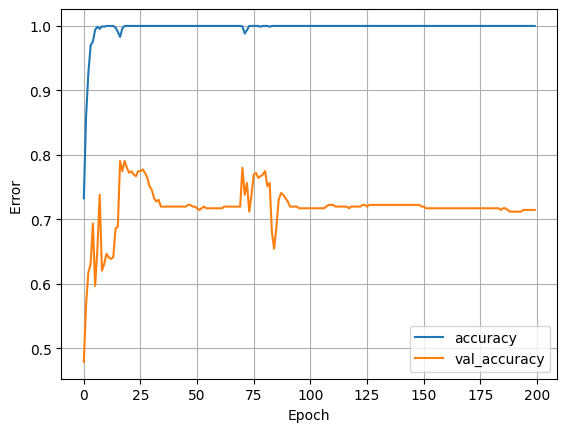

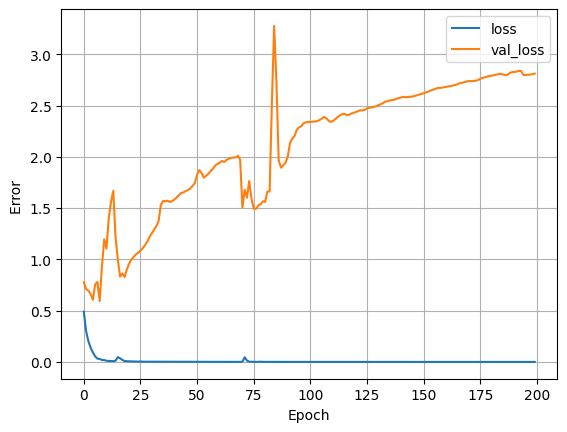

15/15 - 0s - loss: 2.4743 - accuracy: 0.8410 - 49ms/epoch - 3ms/step
Model accuracy: 0.8410041928291321
60/60 [==============================] - 1s 2ms/step


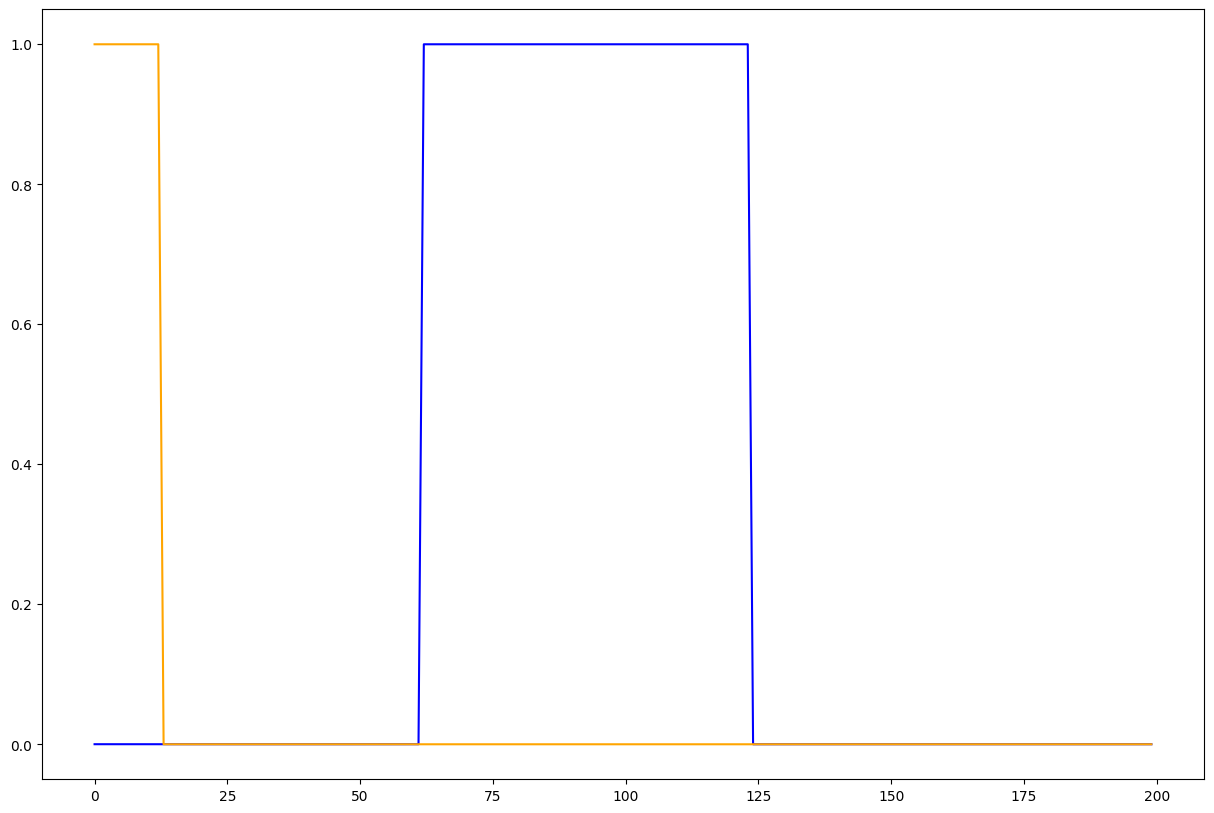

15/15 [==============================] - 0s 3ms/step


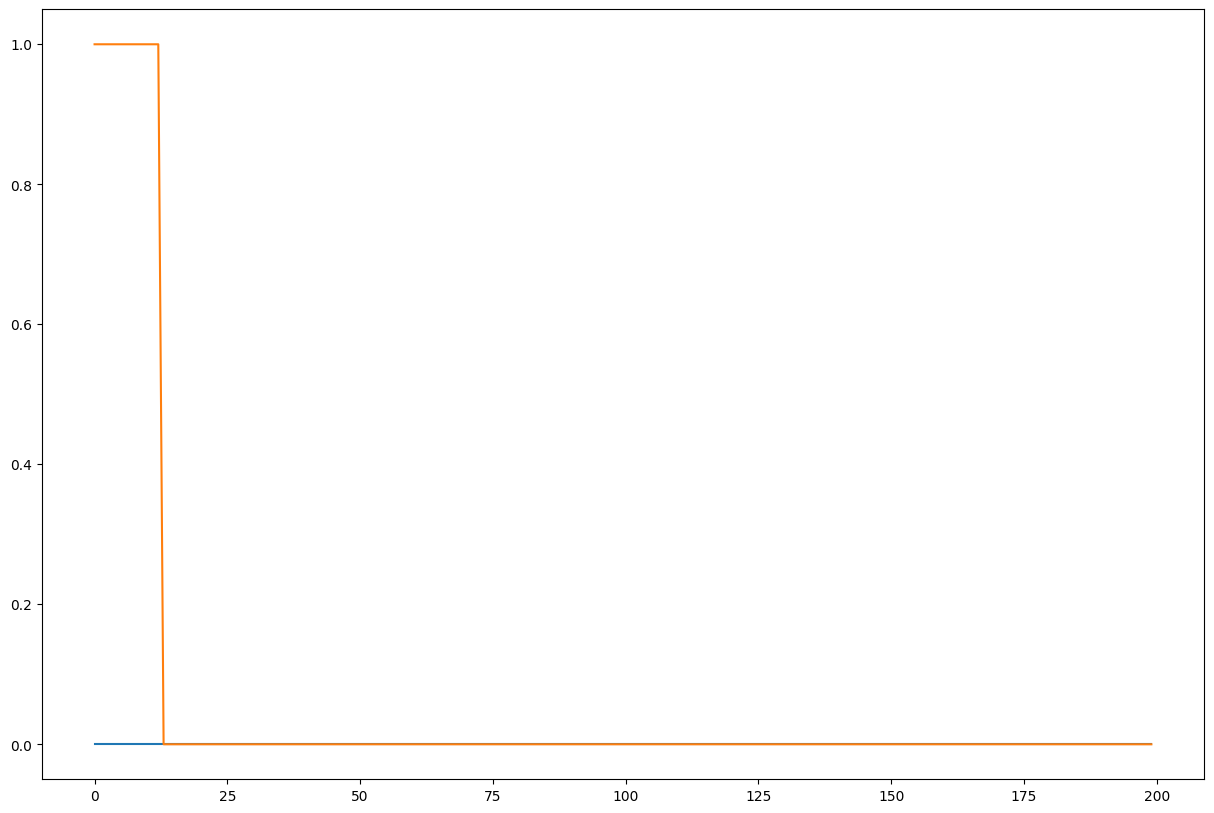

15/15 [==============================] - 0s 3ms/step - loss: 2.4743 - accuracy: 0.8410
Loss: 2.474255084991455
Accuracy: 0.8410041928291321
Precision: 0.0
Recall: 0.0
Confusion Matrix:
[[402  63]
 [ 13   0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91       465
         1.0       0.00      0.00      0.00        13

    accuracy                           0.84       478
   macro avg       0.48      0.43      0.46       478
weighted avg       0.94      0.84      0.89       478




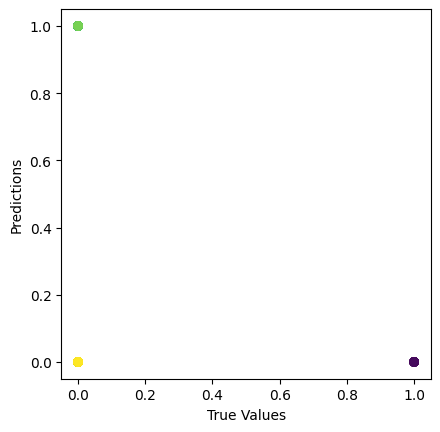

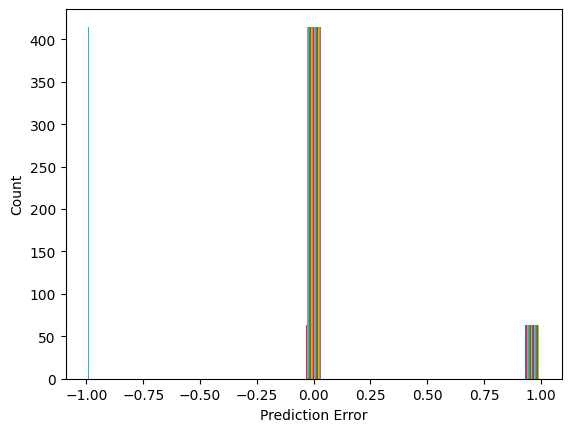

Epoch 1/200
16/16 [==============================] - 2s 23ms/step - loss: 0.7416 - accuracy: 0.6398 - val_loss: 0.7061 - val_accuracy: 0.6099
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5836 - accuracy: 0.7367 - val_loss: 0.6841 - val_accuracy: 0.6335
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5082 - accuracy: 0.7950 - val_loss: 0.6466 - val_accuracy: 0.6492
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4555 - accuracy: 0.8337 - val_loss: 0.6448 - val_accuracy: 0.6414
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4076 - accuracy: 0.8579 - val_loss: 0.6274 - val_accuracy: 0.6492
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.3525 - accuracy: 0.8834 - val_loss: 0.6087 - val_accuracy: 0.6702
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 0.3058 - accuracy: 0.9116 - val_loss: 0.6024 - val_accuracy: 0.6728
Epoch 8/200


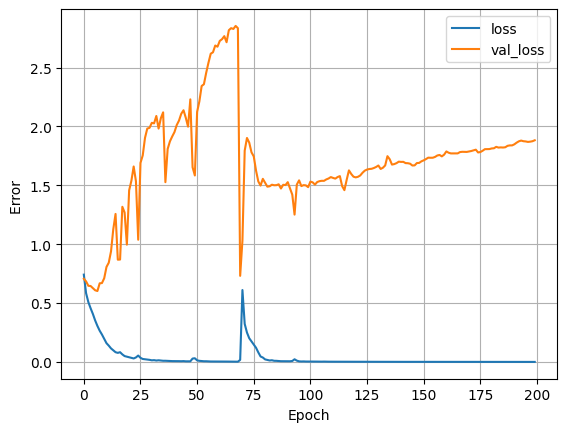

15/15 [==============================] - 0s 2ms/step
15/15 - 0s - loss: 1.1595 - accuracy: 0.8305 - 35ms/epoch - 2ms/step
Model accuracy: 0.8305439352989197
15/15 [==============================] - 0s 2ms/step - loss: 1.1595 - accuracy: 0.8305
Loss: 1.1595032215118408
Accuracy: 0.8305439352989197
Precision: 0.0
Recall: 0.0


NameError: name 'y_test' is not defined

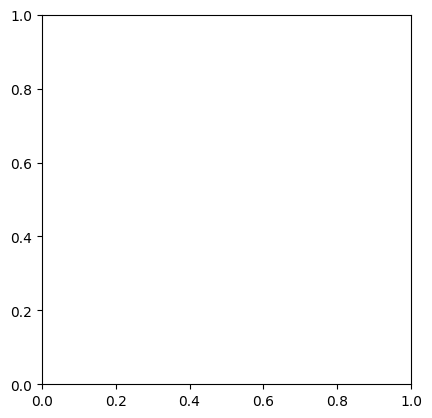

NameError: name 'y_test' is not defined

2023-11-13 18:35:30,414	WARNING worker.py:2058 -- Raylet is terminated. Termination is unexpected. Possible reasons include: (1) SIGKILL by the user or system OOM killer, (2) Invalid memory access from Raylet causing SIGSEGV or SIGBUS, (3) Other termination signals. Last 20 lines of the Raylet logs:
    [state-dump] 	ObjectManager.ObjectDeleted - 43 total (0 active), CPU time: mean = 9.643 us, total = 414.650 us
    [state-dump] 	ClientConnection.async_write.DoAsyncWrites - 33 total (0 active), CPU time: mean = 395.242 ns, total = 13.043 us
    [state-dump] 	NodeManagerService.grpc_server.GetSystemConfig - 33 total (0 active), CPU time: mean = 88.140 us, total = 2.909 ms
    [state-dump] 	NodeManager.deadline_timer.print_event_loop_stats - 27 total (1 active, 1 running), CPU time: mean = 414.546 us, total = 11.193 ms
    [state-dump] 	RaySyncer.BroadcastMessage - 13 total (0 active), CPU time: mean = 90.408 us, total = 1.175 ms
    [state-dump] 	 - 13 total (0 active), CPU time: mean =

In [28]:
data = augmented_data_array
%run model_rnn.ipynb

